# Problem 8

## Retrieve the MNIST handwriting data

In [158]:
from sklearn.datasets import fetch_mldata
from math import sqrt
mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [159]:
X = mnist["data"]
y = mnist["target"]
print("Data set conatains {} images with {} features.".format(*X.shape))
print("The features are a {}x{} array of pixels".format(sqrt(X.shape[1]), sqrt(X.shape[1])))

Data set conatains 70000 images with 784 features.
The features are a 28.0x28.0 array of pixels


## let's display an example of one image

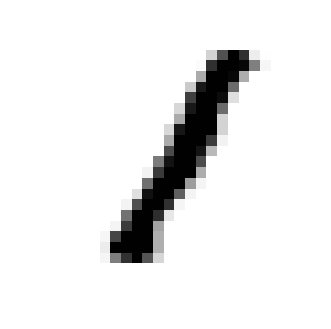

In [160]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.cm import binary
import seaborn as sns
sns.set()

# pick out a digit from the data set
digit_index = 6563
ex_digit = X[digit_index]
# the data is a 1D array of numbers, we want it as a 2D array of pixels
ex_digit_img = ex_digit.reshape(28, 28)

# show the image
plt.imshow(ex_digit_img, cmap=binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [161]:
print("This was an image of a {}".format(y[digit_index]))

This was an image of a 1.0


## Split up our data into Training, Validation, and Testing

In [162]:
import numpy as np
# shuffle the data
shuffle = np.random.permutation(70000)
X = X[shuffle]
y = y[shuffle]
Ntrain = 40000
Nvalidate = 10000
Ntest = 10000
if (Ntrain+Nvalidate+Ntest < y.shape[0]):
    # dividing up the images
    X_train = X[:Ntrain]
    X_validate = X[Ntrain:Ntrain+Nvalidate]
    X_test = X[Ntrain+Nvalidate:Ntrain+Nvalidate+Ntest]
    # dividing up the targets
    y_train = y[:Ntrain]
    y_validate = y[Ntrain:Ntrain+Nvalidate]
    y_test = y[Ntrain+Nvalidate:Ntrain+Nvalidate+Ntest]
    
else:
    print("Cannot divide up data that way, exiting.")
    raise ValueError
print("Done dividing up the data")
print("Training set contains values: ", set(y_train))
print("Validation set contains values: ", set(y_validate))
print("Testing set contains values: ", set(y_test))

Done dividing up the data
Training set contains values:  {0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0}
Validation set contains values:  {0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0}
Testing set contains values:  {0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0}


## Figuring out digits through a random forest

[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    4.8s remaining:    4.8s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    5.4s finished
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.4s remaining:    0.4s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.4s finished


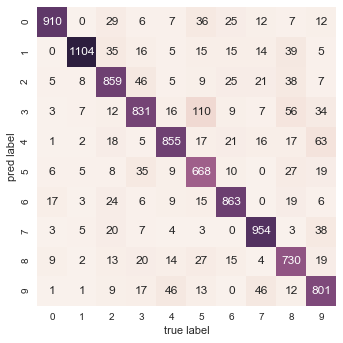

In [163]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier




bagging_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=10,
                                bootstrap=True, n_jobs=-1, verbose=1, 
                                max_samples=1000)
bagging_clf.fit(X_train, y_train)

y_pred = bagging_clf.predict(X_test)


# plot the result
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('pred label')
plt.show()